WebScraping HW 
By: Omer Abdelrahim

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from string import ascii_uppercase as alc
import re
import string
import time

### Q1.A.) Create a list of links for all the wikipedia pages for NYSE traded companies A-Z and 0-9

In [2]:
URL = "https://en.wikipedia.org/wiki/Lists_of_companies_listed_on_the_New_York_Stock_Exchange"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")

In [3]:
links = soup.find_all("a", href=True)

for link in links:
    href = link.get("href")
    if href.startswith("/wiki/Co"):
        print(href)

/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(0%E2%80%939)
/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(A)
/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(B)
/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(C)
/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(D)
/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(E)
/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(F)
/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(G)
/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(H)
/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(I)
/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(J)
/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(K)
/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(L)
/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(M)
/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(N)
/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(O)
/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(P)
/wik

### Q1.B.) Crawl through all the URLs and make 1 DF with all the NYSE publically traded companies

In [4]:
df_set=[]
for i in alc:
    html = requests.get(f'https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_({i})').content
    df_list = pd.read_html(html)
    df_set.append(df_list)

In [5]:
Output = []
for temp in df_set:
    for elem in temp:
        Output.append(elem)

In [6]:
htmlnew = requests.get('https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(0-9)').content
df_listnew = pd.read_html(htmlnew)

df_pre=pd.concat(Output)

In [7]:
df_listnew=np.array(df_listnew)
df_listnew=np.reshape(df_listnew,(4,3))
df_listnew=pd.DataFrame(df_listnew, columns=['Stock name','Symbol','Country of origin'])

In [8]:
df=pd.concat([df_pre,df_listnew])

### Q1.C.) What is the percetages of companies that contain 1 letter, 2 letters, 3 letters, 4 letters, 5 letters,... in the ticker (drop punctuation)?

In [9]:
df['Punc. Removed']=df['Symbol'].str.replace('.','')
df['Ticker length']=df['Punc. Removed'].str.len()

In [10]:
df.tail()

,Stock name,Symbol,Country of origin,Punc. Removed,Ticker length
12,Zurn Elkay Water Solutions Corporation,ZWS,United States,ZWS,3
0,10X Capital Venture Acquisition Corp. III,VCXB,United States,VCXB,4
1,10X Capital Venture Acquisition Corp. III,VCXB.U,United States,VCXBU,5
2,3D Systems Corporation,DDD,United States,DDD,3
3,3M Company,MMM,United States,MMM,3


<Axes: xlabel='Ticker length'>

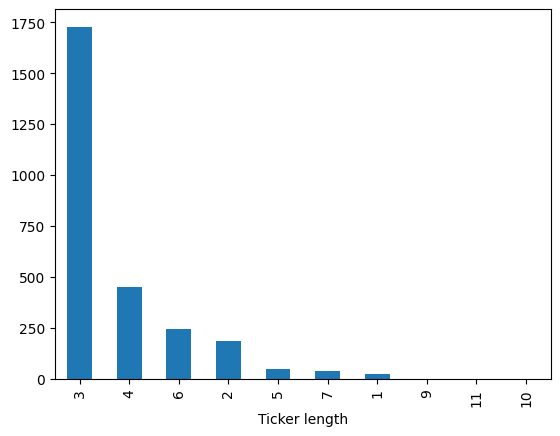

In [11]:
df['Ticker length'].value_counts().plot(kind='bar')

In [12]:
stuff=[1,2,3,4,5,6,7,9,10,11]
counting=[]
for i in stuff:
    numbers = df['Ticker length'].value_counts()[i]
    counting.append(numbers)

In [13]:
percents=[]
for i in counting: 
    calcs=(i/sum(counting))*100
    percents.append(calcs)
    
formatting = [f'{percent:.2f}%' for percent in percents]
print(formatting)

['0.84%', '6.81%', '63.27%', '16.55%', '1.83%', '9.04%', '1.50%', '0.07%', '0.04%', '0.04%']


# Q2.) Web Scraping Using Beautiful Soup

### Q2.A.) Using Beautiful soup .findAll method you will webscrape the front page of Reddit. Get a list of all of the "timestamps"

In [14]:
user_agent_list = ["Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246" 
,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.111 Safari/537.36 "
,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9 "
,"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15.0) Gecko/20100101 Firefox/15.0.1" 
,"Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36"] 

headers = {
    'User-Agent': user_agent_list[2]}

In [15]:
URL = "https://www.reddit.com"

In [16]:
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")
timestamps = soup.find_all("shreddit-post", {"created-timestamp": True})

In [18]:
time10=[]
for timestamp in timestamps:
    created_timestamp = timestamp["created-timestamp"]
    time10.append(created_timestamp)

In [19]:
time10

['2024-04-30T20:06:36.858000+0000',
 '2024-04-30T10:10:57.504000+0000',
 '2024-04-30T22:54:19.923000+0000']

### Q2.B.) Using the functions findChild, descendents, etc. locate the post title, text and post time into a dataframe.

In [20]:
page = requests.get(URL)
html_content = page.content
soup = BeautifulSoup(html_content, "html.parser")
shreddit_posts = soup.find_all("shreddit-post")
for post in shreddit_posts:
    created_timestamp = post.get("created-timestamp")
    content_href = post.get("content-href")
    post_title = post.get("post-title")

    print("Created Timestamp:", created_timestamp)
    print("Content Href:", content_href)
    print("Post Title:", post_title)
    print("------------------------")

Created Timestamp: 2024-04-30T20:06:36.858000+0000
Content Href: https://www.reddit.com/r/AskReddit/comments/1ch2cmb/people_thirties_to_fifties_what_kind_of_hobbies/
Post Title: People thirties to fifties what kind of hobbies are you doing these days?
------------------------
Created Timestamp: 2024-04-30T10:10:57.504000+0000
Content Href: https://www.reddit.com/r/NoStupidQuestions/comments/1cgp9iy/do_you_guys_really_take_at_least_one_shower_per/
Post Title: do you guys really take at least one shower per day?
------------------------
Created Timestamp: 2024-04-30T22:54:19.923000+0000
Content Href: https://i.imgur.com/TK5peQo.jpeg
Post Title: Sitting in the hospital waiting room and nurse came up and said it looks ok to her.
------------------------


In [21]:
created_timestamps = []
content_hrefs = []
post_titles = []

for post in shreddit_posts:
    created_timestamps.append(post.get("created-timestamp"))
    content_hrefs.append(post.get("content-href"))
    post_titles.append(post.get("post-title"))

data = {
    "Time Posted": created_timestamps,
    "Post Text": content_hrefs,
    "Post Title": post_titles
}

df = pd.DataFrame(data)

In [22]:
df

,Time Posted,Post Text,Post Title
0,2024-04-30T20:06:36.858000+0000,https://www.reddit.com/r/AskReddit/comments/1c...,People thirties to fifties what kind of hobbie...
1,2024-04-30T10:10:57.504000+0000,https://www.reddit.com/r/NoStupidQuestions/com...,do you guys really take at least one shower pe...
2,2024-04-30T22:54:19.923000+0000,https://i.imgur.com/TK5peQo.jpeg,Sitting in the hospital waiting room and nurse...


# Q3.) RegEx

### Q3.A.) Using RegEx, get all the urls of ladder faculty profiles for UCLA Economics

In [23]:
URL = "https://economics.ucla.edu/faculty/ladder"

In [24]:
response = requests.get(URL)
html_content = response.text
url_pattern = r'https://economics\.ucla\.edu/person/[a-z-]+/?'

faculty_profile_urls = re.findall(url_pattern, html_content)
faculty_profile_urls

['https://economics.ucla.edu/person/john-asker/',
 'https://economics.ucla.edu/person/john-asker/',
 'https://economics.ucla.edu/person/andrew-atkeson/',
 'https://economics.ucla.edu/person/andrew-atkeson/',
 'https://economics.ucla.edu/person/martha-bailey/',
 'https://economics.ucla.edu/person/martha-bailey/',
 'https://economics.ucla.edu/person/david-baqaee/',
 'https://economics.ucla.edu/person/david-baqaee/',
 'https://economics.ucla.edu/person/natalie-bau/',
 'https://economics.ucla.edu/person/natalie-bau/',
 'https://economics.ucla.edu/person/saki-bigio/',
 'https://economics.ucla.edu/person/saki-bigio/',
 'https://economics.ucla.edu/person/alexander-bloedel/',
 'https://economics.ucla.edu/person/alexander-bloedel/',
 'https://economics.ucla.edu/person/simon-board/',
 'https://economics.ucla.edu/person/simon-board/',
 'https://economics.ucla.edu/person/ariel-burstein/',
 'https://economics.ucla.edu/person/ariel-burstein/',
 'https://economics.ucla.edu/person/denis-chetverikov/',

### Q3.B.) Webcrawl the links from A and use RegEx to get all the emails and phone numbers of ladder faculty profiles

In [25]:
def extract_contacts(text):
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    phone_pattern = r'\(\d{3}\) \d{3}-\d{4}'
    emails = re.findall(email_pattern, text)
    phones = re.findall(phone_pattern, text)
    return emails, phones

In [26]:
for profile_url in faculty_profile_urls:
    response_profile = requests.get(profile_url)
    html_profile = response_profile.text
    soup = BeautifulSoup(html_profile, 'html.parser')
    text_content = soup.get_text()

    emails, phones = extract_contacts(text_content)

    print("Profile URL:", profile_url)
    print("Emails:", emails)
    print("Phone Numbers:", phones)
    print("--------------------")

Profile URL: https://economics.ucla.edu/person/john-asker/
Emails: ['johnasker@econ.ucla.edu']
Phone Numbers: []
--------------------
Profile URL: https://economics.ucla.edu/person/john-asker/
Emails: ['johnasker@econ.ucla.edu']
Phone Numbers: []
--------------------
Profile URL: https://economics.ucla.edu/person/andrew-atkeson/
Emails: ['andy@atkeson.net']
Phone Numbers: []
--------------------
Profile URL: https://economics.ucla.edu/person/andrew-atkeson/
Emails: ['andy@atkeson.net']
Phone Numbers: []
--------------------
Profile URL: https://economics.ucla.edu/person/martha-bailey/
Emails: ['marthabailey@ucla.edu']
Phone Numbers: []
--------------------
Profile URL: https://economics.ucla.edu/person/martha-bailey/
Emails: ['marthabailey@ucla.edu']
Phone Numbers: []
--------------------
Profile URL: https://economics.ucla.edu/person/david-baqaee/
Emails: ['baqaee@econ.ucla.edu']
Phone Numbers: []
--------------------
Profile URL: https://economics.ucla.edu/person/david-baqaee/
Emails

# Q4.) Selenium

### Q4.A.) Pick a website that has useful data to a business or economic question. Put your website you plan to scrape here : https://docs.google.com/spreadsheets/d/1PJ2DOTCVCh51fn0ry1yB7qTyccR33_IXFpkYdd58MFs/edit?usp=sharing
### You must have use website that no other group has. First come first serve 

In [27]:
URL ="https://nextgenstats.nfl.com/stats/rushing#ryoeAtt"

### Q4.B.) Use Selenium to scrape valuable information from your website and store in a dataframe.

In [28]:
import selenium 
from selenium import webdriver 
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

In [29]:
PATH=r"E:\Downloads\Selenium\chrome-win64\chrome"

In [30]:
options=webdriver.ChromeOptions()
service=Service(ChromeDriverManager().install())

In [31]:
driver = webdriver.Chrome(service=service, options=options)
driver.get(URL)
time.sleep(15)

In [32]:
table=driver.find_elements(By.CLASS_NAME,'ngs-data-table')
table

[<selenium.webdriver.remote.webelement.WebElement (session="e024df458626b3d13fdd365313344340", element="f.03FBE7E3ADD253E4892F652FCE5A60C7.d.15E3528919EE4892CB92CE429CFCF0FC.e.49")>]

In [33]:
rows = driver.find_elements(By.TAG_NAME, 'tr')
data = []
for row in rows:
    cells = row.find_elements(By.TAG_NAME, 'td')
    if len(cells) > 1:  
        row_data = [cell.text for cell in cells]
        data.append(row_data)

In [34]:
df = pd.DataFrame(data[1:], columns=data[0])

In [35]:
df.rename(columns={"": "Player Name"}, inplace=True)

In [36]:
df.loc[-1] = ['','MIA',3.04,11.65,2.93,103,800,279,7.8,2.87,47.4,8]
df.index = df.index + 1
df = df.sort_index() 

In [37]:
df=df.rename(columns={'MIA':'TEAM','3.04':'EFF','11.65':'8+D%', '2.93':'TLOS', '103':'ATT', '800':'YDS', 
                  '279':'RYOE', '7.8':'RYOE', '2.87':'RYOE/ATT', '47.4':'ROE%', '8':'TD'})

In [38]:
new_df = df.iloc[49:98].copy()
df.drop(df.index[49:99], inplace=True)
new_df=new_df.reset_index()
new_df=new_df['Player Name']
df=df.drop(['Player Name'], axis=1)

In [39]:
df=pd.concat([df,new_df],axis=1)

In [40]:
cols = df.columns.tolist()  
cols.insert(0, cols.pop())
df = df[cols] 

In [41]:
df

,Player Name,TEAM,EFF,8+D%,TLOS,ATT,YDS,RYOE,RYOE,RYOE,RYOE,RYOE/ATT,ROE%,TD
0,Devon Achane,MIA,3.04,11.65,2.93,103,800,279,7.8,279,7.8,2.87,47.4,8
1,Christian McCaffrey,SF,3.59,36.03,2.8,272,1459,349,5.4,349,5.4,1.32,46.6,14
2,Jaylen Warren,PIT,3.63,12.08,2.86,149,784,162,5.3,162,5.3,1.11,39.7,4
3,James Conner,ARI,3.75,25,2.96,208,1040,211,5,211,5,1.02,43,7
4,Zack Moss,IND,3.31,14.75,2.67,183,794,129,4.3,129,4.3,0.71,41.8,5
5,Breece Hall,NYJ,4.02,19.28,2.96,223,994,146,4.5,146,4.5,0.67,33.9,5
6,Kyren Williams,LAR,3.22,4.82,2.63,228,1144,146,5,146,5,0.65,42.4,12
7,Raheem Mostert,MIA,4.25,14.35,2.93,209,1012,126,4.8,126,4.8,0.61,38.5,18
8,Isiah Pacheco,KC,3.57,12.2,2.76,205,935,91,4.6,91,4.6,0.45,40,7
9,James Cook,BUF,3.47,10.13,2.64,237,1122,105,4.7,105,4.7,0.45,42.7,2


### Q4.C.) Write a short paragraph about the businesses or research that would use the data you scraped. Describe it's value and what it can be used for.

While most teams have in house teams that work on procuring the most up to date and cutting edge stats, NFL NGS and its partnership with AWS still control and have the access to the most experienced professionals who work on making new and novel statistics to analyze player preformance. The latest big data bowl for example is looking into ways to properly evaluate tackling metrics and get predictive metrics for tackling numbers and measure how good defensive players really are at tackling. We're probably a few years away from such advanced stats being actually implemented to better understand and measure defensive preformance, but the name of the game in modern sports is finding advantages at the margin since professinal teams are generally closely matched. Metrics like RYOE and EPA are important in evaluating and understanding how good individual players are at their job, and new metrics that look into pass blocking and tackling can help give GMs and other organization decision makers an edge when it comes to managing their money in the modern age. After all large contracts given to underpreforming individuals can essentially be a multi-year setback for even the most robust of sports franchises. 
There is also no package now that can scrape inforation from NGS. 